In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Code forward pass

Note that the way scikit-learn encode the datasets is different (row represents a sample, columns features). So we need to change the matrix order in the multiplication


$\mathbf{x} = \begin{bmatrix}
x_0\\ 
x_1\\ 
x_2\\ 
...\\ 
x_d
\end{bmatrix}$ ,       $\mathbf{w} = \begin{bmatrix}
w_0\\ 
w_1\\ 
w_2\\ 
...\\ 
w_d
\end{bmatrix}$

$\large h(\mathbf{x}) = \mathbf{w}^T \mathbf{x}$

This formula assumes each exemple is represented by a column. However in Python (scikit-learn we do the oposite). 

Also the weights are represented by row vectors instead of columns (1D numpy arrays)

So for implemetation we need to change to:


$\large h(\mathbf{x}) = \mathbf{x}\mathbf{w}$


In [2]:
X = np.array([[1], [2], [3]])
y = np.array([1, 2, 3])
w = np.array([0]) #init weights


In [6]:
print(X.shape)
print(y.shape)
print(w.shape)

(3, 1)
(3,)
(1,)


In [24]:
#code here
hx = np.dot(X, w)

## Code Cost function (MSE ) 

Equation:

$\Large J(\mathbf{w}) = \frac{1}{2N}\sum_{i=1}^{N} (h(\mathbf{x}_i) - y_i)^2$

4 steps:

- Get the difference between predictins and targets
- Square their differences
- Get the mean difference
- divide by two

Test case:

- hx = [0, 0, 0]

- y = [1, 2, 3]

Result

- J(w) = 2.333333...


In [25]:
#code here
diff = hx - y
diff_squared = diff ** 2
somme = np.sum(diff_squared)
mse = somme / (2 * y.size)
print(mse)

1.9273291897942386


## Code Gradients estimation

$\large \nabla J(\mathbf{W}) = \frac{1}{N} \sum_{i=1}^{N} (h(\mathbf{x}_i) - y_i)\mathbf{x}_i$

Test case:

- hx = [0, 0, 0]

- X = [1, 2, 3]

- y = [1, 2, 3]

Result:

- J'(w) = -4.6666

In [26]:
# code here
diff = hx - y
grad = np.dot(diff, X) / y.size

## Code Gradient descent

$\mathbf{w}^{iter+1} = \mathbf{w}^{iter} - \alpha \nabla J(\mathbf{w})$

In [27]:
#code here
alpha = 0.01
w = w - (alpha * grad)
print(w)

[0.1335683]


## Régression Linéaire

In [28]:
class LinearRegression:
    
    def __init__(self, n_iter, learning_rate):
        self.n_iter = n_iter # for stopping criteria, we could do better here...
        self.learning_rate = learning_rate
        self.J_history = [] # keep optimisation history
        
    def fit(self, X, y):
        """Function with the training code. Learn the parameters W of the model"""
        
        # keep information of number of examples and dimensions.
        self.n_samples = X.shape[0]
        self.n_features = X.shape[1]
        
        # add ones for the bias.
        x_0 = np.ones((self.n_samples, 1))
        X_tmp = np.hstack((x_0, X))
        
        # initialize weights 'W' of the model randomly
        self.W = np.random.rand(self.n_features + 1) # +1 include biais

        for _ in range(self.n_iter):
            # get prediction of current weights. (forward pass)
            hx = np.dot(X_tmp, self.W)
            # check the cost to know whether the model is learning or not.
            cost_J = self.compute_cost(hx, y)
            self.J_history.append(cost_J)
            #compute gradient
            grad = self.compute_gradient(X_tmp, hx, y)
            #update weights
            self.W = self.W - (self.learning_rate * grad)
            
    def predict(self, X):
        """Our hypothesis h(x) to be applied over test data"""
        # add the ones vector.
        x_0 = np.ones((X.shape[0], 1))
        X_tmp = np.hstack((x_0, X))
        return np.dot(X_tmp, self.W)
    
    def compute_cost(self, hx, y):
        diff = hx - y
        diff_squared = diff ** 2
        somme = np.sum(diff_squared)
        mse = somme / (2 * y.size)
        return mse
    
    def compute_gradient(self, X, hx, y):
        diff = hx - y
        grad = np.dot(diff, X) / y.size
        return grad
        
    def plot_learning_curve(self):
        plt.plot(np.arange(self.n_iter), self.J_history)
        plt.xlabel('Iteration', fontsize=18)
        plt.ylabel('J(w)', fontsize=18)

## Scikit-learn boston house pricing (Again)

If we have time at the end we can do the Baseball players salary prediction too...

In [29]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Normalisation

In [30]:
scaler = StandardScaler() # Normalize data
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
X_train_scaled

array([[-0.40317551,  2.94111886, -0.90857042, ...,  0.34179631,
         0.44790707, -1.11305185],
       [ 6.8872731 , -0.47357476,  1.02048945, ...,  0.81063742,
         0.32022509,  1.44619093],
       [-0.39992467, -0.47357476, -1.04059733, ..., -0.8771906 ,
         0.38765145, -0.80224665],
       ...,
       [-0.39698636,  0.05997112, -0.48021644, ..., -1.53356816,
         0.37941045,  0.42837391],
       [-0.40056367, -0.47357476, -1.27384487, ..., -0.31458126,
         0.34312865,  0.06996792],
       [-0.38594726,  0.46546599, -0.77507654, ...,  0.2949122 ,
         0.22572116, -0.3500391 ]])

## Fit Linear Regression

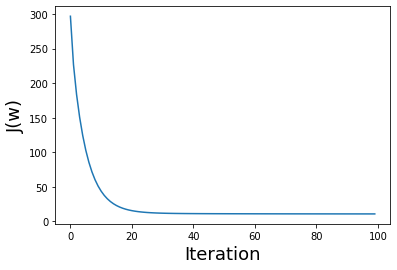

In [43]:
lr = LinearRegression(n_iter=100, learning_rate=0.1)
lr.fit(X_train_scaled, y_train)
lr.plot_learning_curve()

In [40]:
lr.J_history[0:10]

[293.85939941988136,
 181.06302561503168,
 479.35954107426363,
 1958.6184508920483,
 8378.83778085045,
 36042.839809709636,
 155191.79135037377,
 668351.8441623923,
 2878464.623930302,
 12397126.88093668]

## Evaluate over test set

In [44]:
from sklearn.metrics import mean_squared_error
hx_test = lr.predict(X_test_scaled)
score = mean_squared_error(hx_test, y_test)
print(f'Score linear regression: {score}')

Score linear regression: 24.22672141656136


In [46]:
from sklearn.linear_model import LinearRegression
lr_sklearn = LinearRegression()
lr_sklearn.fit(X_train_scaled, y_train)

LinearRegression()

In [47]:
hx_sklearn = lr_sklearn.predict(X_test_scaled)
score = mean_squared_error(hx_sklearn, y_test)

In [48]:
score

24.438085084627424